# Task-4 To Explore Decision Tree Algorithm 
For the given ‘Iris’ dataset, creating the Decision Tree classifier and visualizing it graphically.

In [56]:
# importing required libraries
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
%matplotlib inline 

In [57]:
# Loading the iris dataset
data = pd.read_csv('Task 4/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
new_data = list(data.columns[2:])
new_data

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

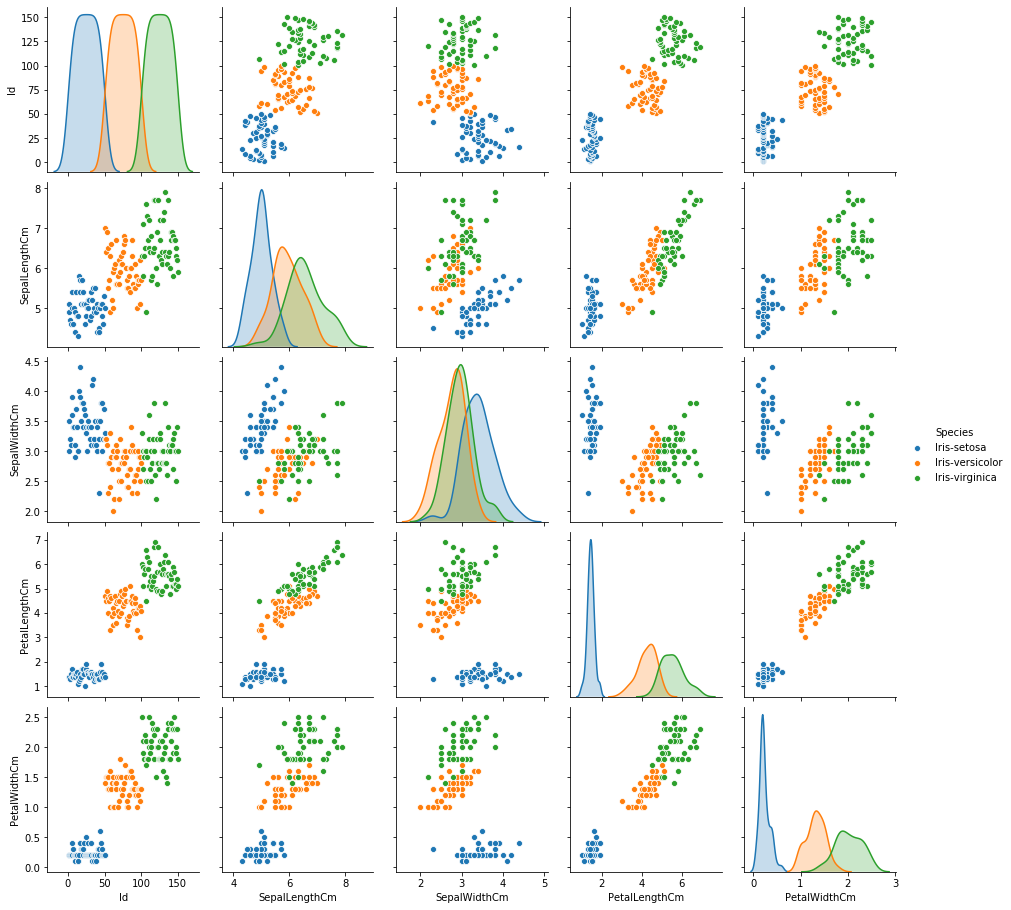

In [61]:
sns.pairplot( data , hue = 'Species')

**Segregating the data**

In [62]:
#  import Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in Column Species
data['Species'] = label_encoder.fit_transform(data['Species'])
data['Species'].unique()

array([0, 1, 2])

In [63]:
#Separating the dataset into dependent and independent variables
X=data.iloc[:,[1,2,3,4]]
y=pd.Series(data.Species)

In [64]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

**Training the data**

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**Implementation of Decision Tree Classifier**

In [67]:
from sklearn import tree
#Create Decision tree classifier
classifier=tree.DecisionTreeClassifier(random_state=0)

#Train Decision tree classifier
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [74]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Testing of data**

In [68]:
#Predict response for test dataset
y_pred_tree=classifier.predict(X_test)
print(y_pred_tree)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9777777777777777


**Visualization of data**

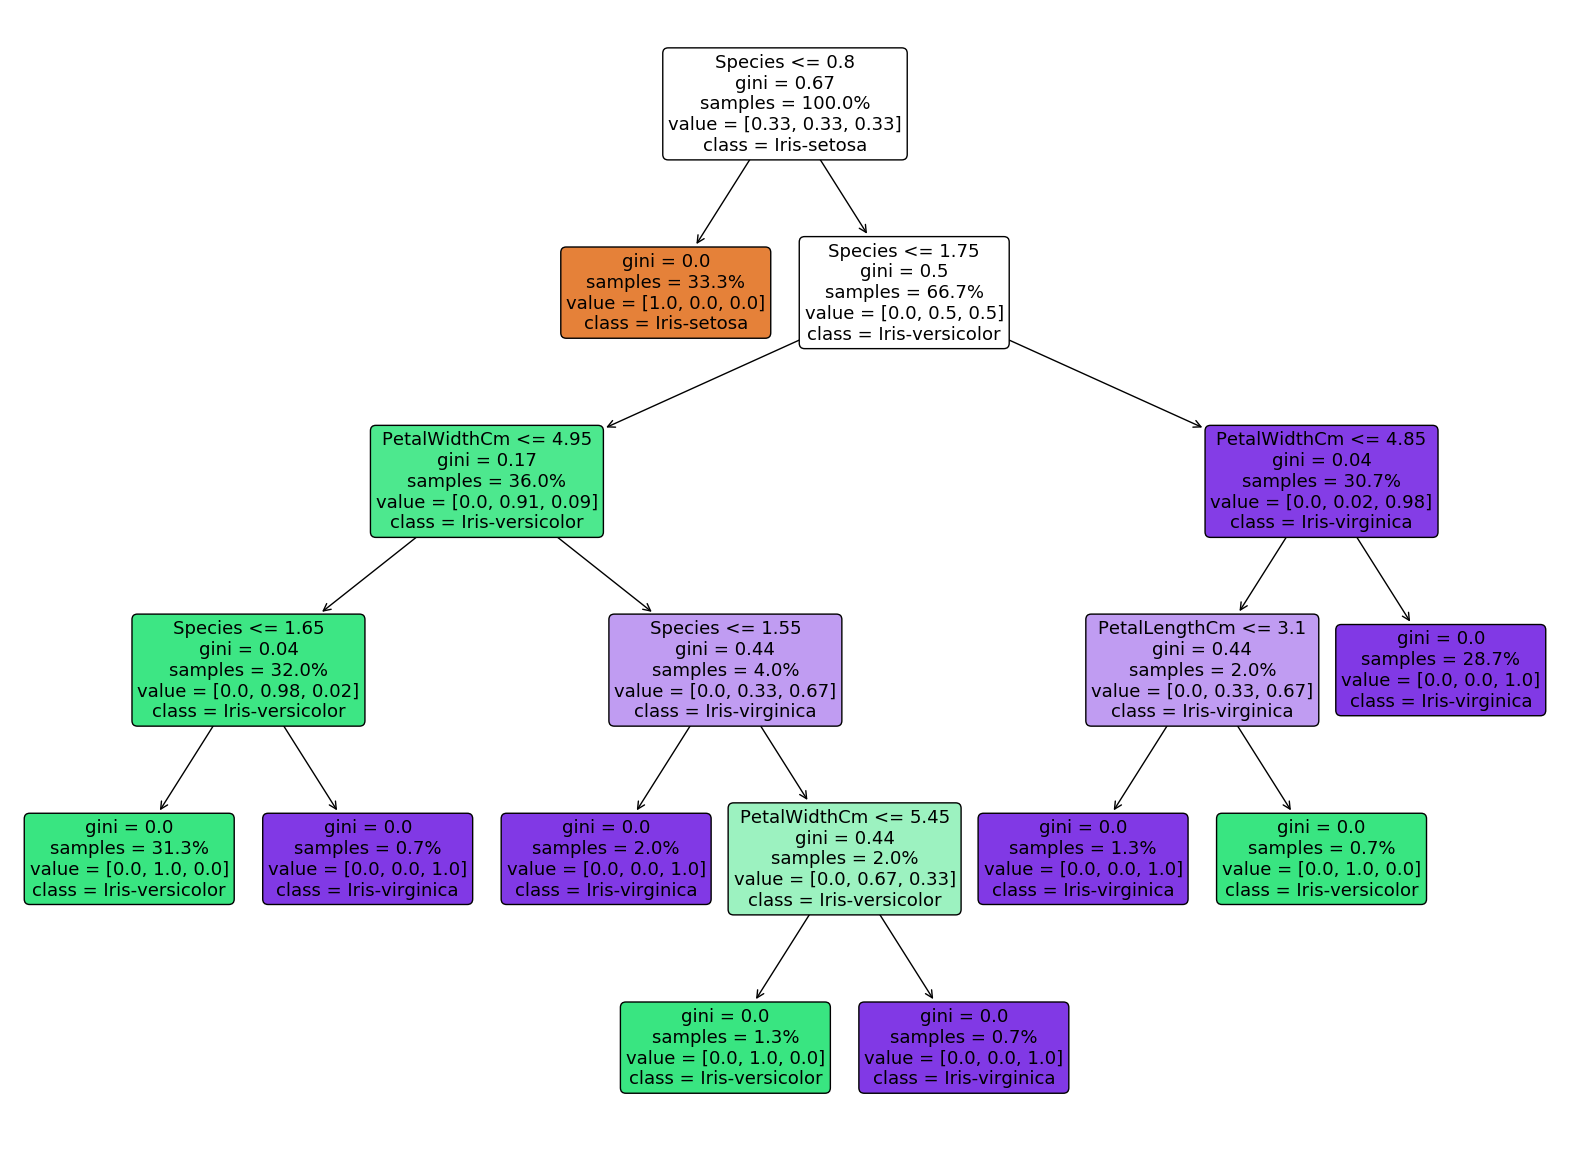

In [73]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize =(20,15), facecolor = 'white', dpi = 100)
classifier.fit(X,y)
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
tree_plt = tree.plot_tree(classifier, feature_names = new_data , fontsize = 13,class_names = target , precision = 2, proportion = True, filled = True , rounded = 10)
plt.show()
